https://www.kaggle.com/datasets/saidaminsaidaxmadov/chocolate-sales

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chocolate-sales/ChocolateSales.pbix
/kaggle/input/chocolate-sales/Chocolate Sales (2).csv
/kaggle/input/chocolate-sales/ChocolateSales.pdf
/kaggle/input/chocolate-sales/ChocolateSales.pbit


In [2]:
df = pd.read_csv("/kaggle/input/chocolate-sales/Chocolate Sales (2).csv")
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   3282 non-null   object
 1   Country        3282 non-null   object
 2   Product        3282 non-null   object
 3   Date           3282 non-null   object
 4   Amount         3282 non-null   object
 5   Boxes Shipped  3282 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 154.0+ KB


In [4]:
#change object to int
df_clean = df.copy()

df_clean["Amount"] = (
    df_clean["Amount"]
    .replace('[\$,]', '', regex=True)
    .astype(float)
)

#change datetime
df_clean["Date"] = pd.to_datetime(df_clean["Date"], dayfirst=True)

print(df_clean.dtypes)

Sales Person             object
Country                  object
Product                  object
Date             datetime64[ns]
Amount                  float64
Boxes Shipped             int64
dtype: object


<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_17/1449897207.py:6: SyntaxWarning: invalid escape sequence '\$'
  .replace('[\$,]', '', regex=True)


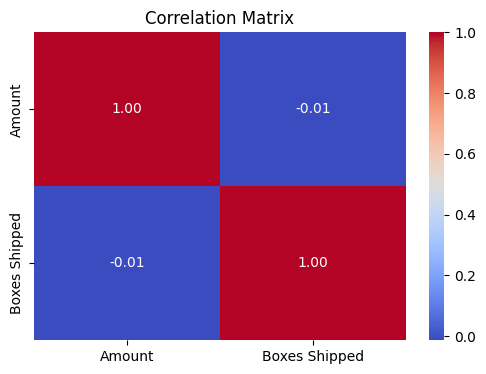

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(
    df_clean[["Amount", "Boxes Shipped"]].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Matrix")
plt.show()

In [6]:
df_clean["Year"] = df_clean["Date"].dt.year
df_clean["Month"] = df_clean["Date"].dt.to_period("M")

df_clean["Price_per_box"] = df_clean["Amount"] / df_clean["Boxes Shipped"]

In [7]:
df_clean.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Year,Month,Price_per_box
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180,2022,2022-01,29.555556
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94,2022,2022-08,84.000000
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91,2022,2022-07,49.461538
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342,2022,2022-04,37.210526
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184,2022,2022-02,74.375000


In [8]:
df_clean[["Amount", "Boxes Shipped", "Price_per_box"]].describe()

,Amount,Boxes Shipped,Price_per_box
count,3282.000000,3282.000000,3282.000000
mean,6030.338775,164.666971,111.340158
std,4393.980200,124.024736,295.314947
min,7.000000,1.000000,0.013514
25%,2521.495000,71.000000,15.460976
50%,5225.500000,137.000000,38.192954
75%,8556.842500,232.000000,83.808388
max,26170.950000,778.000000,4692.360000


In [9]:
product_summary = (
    df_clean.groupby("Product")
    .agg({
        "Amount": "sum",
        "Boxes Shipped": "sum",
        "Price_per_box": "mean"
    })
    .sort_values("Amount", ascending=False)
)

product_summary

,Amount,Boxes Shipped,Price_per_box
Product,,,
Smooth Sliky Salty,1120201.09,26969,92.188668
50% Dark Bites,1087659.35,29810,117.096311
White Choc,1054257.00,25158,246.487640
Peanut Butter Cubes,1036591.09,25339,96.841860
Eclairs,996947.96,26678,124.347012
99% Dark & Pure,960033.45,24818,155.224428
85% Dark Bars,955268.24,23828,109.348544
Organic Choco Syrup,945345.73,23602,96.722694
Spicy Special Slims,938131.69,26662,126.797867


In [10]:
country_summary = (
    df_clean.groupby("Country")["Amount"]
    .sum()
    .sort_values(ascending=False)
)

country_summary

Country
Australia      3646444.35
UK             3365388.90
India          3343730.83
USA            3313858.09
Canada         3078495.65
New Zealand    3043654.04
Name: Amount, dtype: float64

In [11]:
sales_summary = (
    df_clean.groupby("Sales Person")["Amount"]
    .sum()
    .sort_values(ascending=False)
)

sales_summary.head(10)

Sales Person
Ches Bonnell           1022599.96
Oby Sorrel             1017204.12
Madelene Upcott        1010028.72
Kelci Walkden          1002929.10
Brien Boise             997326.48
Van Tuxwell             974425.09
Dennison Crosswaite     931849.57
Beverie Moffet          892421.37
Kaine Padly             849062.76
Marney O'Breen          836427.63
Name: Amount, dtype: float64

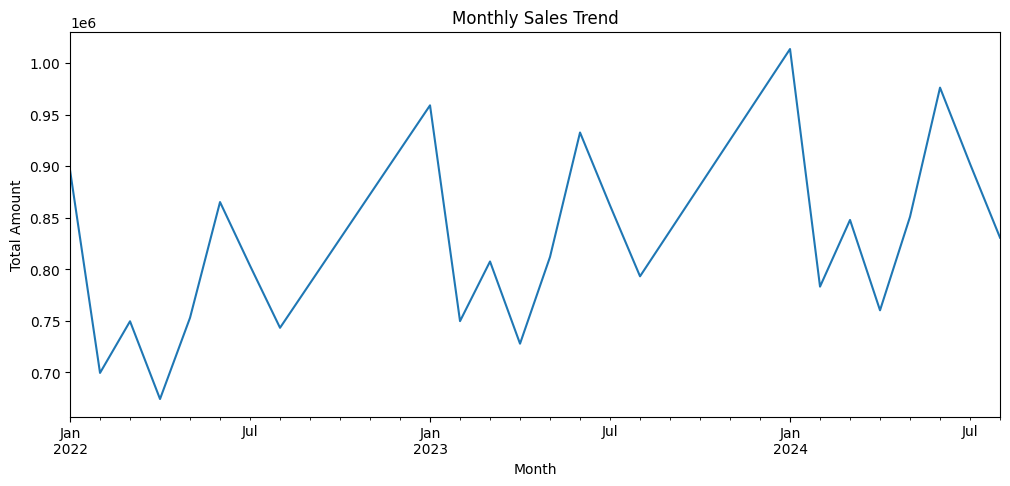

In [12]:
monthly_sales = df_clean.groupby("Month")["Amount"].sum()

plt.figure(figsize=(12,5))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.ylabel("Total Amount")
plt.show()

In [13]:
df_clean[["Amount", "Boxes Shipped", "Price_per_box"]].corr()

,Amount,Boxes Shipped,Price_per_box
Amount,1.000000,-0.013154,0.231108
Boxes Shipped,-0.013154,1.000000,-0.336027
Price_per_box,0.231108,-0.336027,1.000000


Overall correlation between amount and boxes shipped is nearly zero, indicating that revenue is not purely volume-driven. This suggests strong variation in product pricing.

In [14]:
df_clean["Price_per_box"] = df_clean["Amount"] / df_clean["Boxes Shipped"]

df_clean.groupby("Product")["Price_per_box"].mean().sort_values(ascending=False)

Product
White Choc              246.487640
Mint Chip Choco         169.830736
99% Dark & Pure         155.224428
Choco Coated Almonds    127.188276
Orange Choco            126.969960
Spicy Special Slims     126.797867
Eclairs                 124.347012
50% Dark Bites          117.096311
Fruit & Nut Bars        113.930505
85% Dark Bars           109.348544
Peanut Butter Cubes      96.841860
Organic Choco Syrup      96.722694
Baker's Choco Chips      95.031763
Raspberry Choco          94.285965
Smooth Sliky Salty       92.188668
Milk Bars                86.133565
Manuka Honey Choco       83.109610
Almond Choco             78.719987
Caramel Stuffed Bars     77.783663
After Nines              77.664147
Drinking Coco            65.306225
70% Dark Bites           61.329081
Name: Price_per_box, dtype: float64

In [15]:
product_sales = df_clean.groupby("Product")["Amount"].sum().sort_values(ascending=False)

share = product_sales / product_sales.sum()
share.cumsum()

Product
Smooth Sliky Salty      0.056600
50% Dark Bites          0.111556
White Choc              0.164824
Peanut Butter Cubes     0.217199
Eclairs                 0.267571
99% Dark & Pure         0.316078
85% Dark Bars           0.364345
Organic Choco Syrup     0.412110
Spicy Special Slims     0.459511
Mint Chip Choco         0.505237
Almond Choco            0.550228
Manuka Honey Choco      0.594955
Milk Bars               0.638724
Raspberry Choco         0.681439
After Nines             0.723741
Fruit & Nut Bars        0.765641
Orange Choco            0.807279
Drinking Coco           0.848824
Baker's Choco Chips     0.889199
Choco Coated Almonds    0.928259
Caramel Stuffed Bars    0.965776
70% Dark Bites          1.000000
Name: Amount, dtype: float64

<Axes: xlabel='Product', ylabel='Country'>

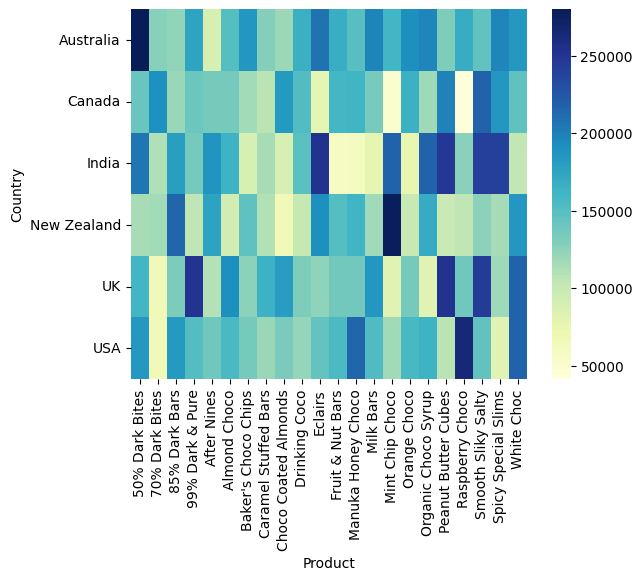

In [16]:
import seaborn as sns

country_product = df_clean.pivot_table(
    index="Country",
    columns="Product",
    values="Amount",
    aggfunc="sum"
)

sns.heatmap(country_product, cmap="YlGnBu")

Regression Modeling

In [17]:
df_clean["Year"] = df_clean["Date"].dt.year
df_clean["Month"] = df_clean["Date"].dt.month
df_clean["Day"] = df_clean["Date"].dt.day
df_clean["DayOfWeek"] = df_clean["Date"].dt.dayofweek  # Monday=0
df_clean["WeekOfYear"] = df_clean["Date"].dt.isocalendar().week.astype(int)


In [18]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

y = df_clean["Amount"].copy()

feature_cols = [
     "Sales Person", "Country", "Product",
    "Boxes Shipped", "Year", "Month", "Day", "DayOfWeek", "WeekOfYear"
]

X = df_clean[feature_cols].copy()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state = 42
)

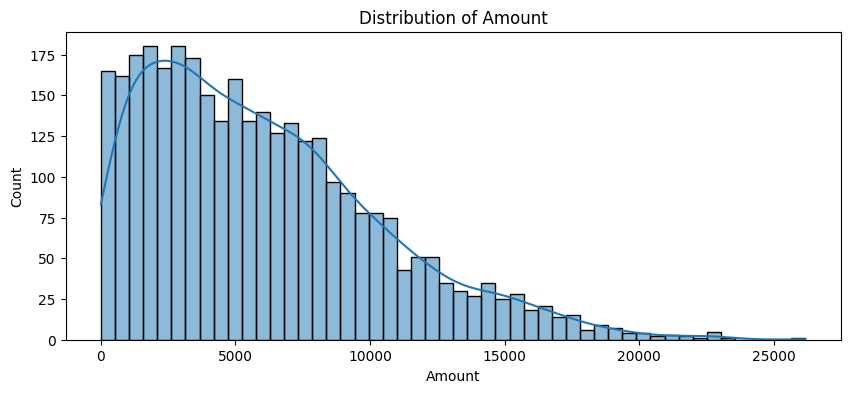

In [20]:
# Amount distribution
plt.figure(figsize=(10,4))
sns.histplot(df_clean["Amount"], bins=50, kde=True)
plt.title("Distribution of Amount")
plt.show()

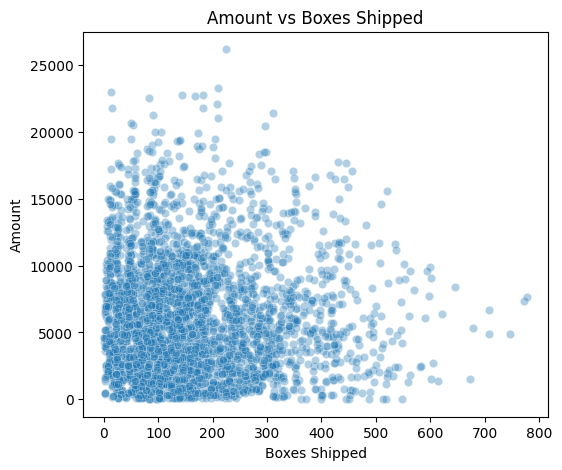

In [21]:
# Amount vs Boxes Shipped
plt.figure(figsize=(6,5))
sns.scatterplot(data=df_clean, x="Boxes Shipped", y="Amount", alpha=0.35)
plt.title("Amount vs Boxes Shipped")
plt.show()

In [22]:
cat_cols = ["Sales Person", "Country", "Product"]
num_cols = ["Boxes Shipped", "Year", "Month", "Day", "DayOfWeek", "WeekOfYear"]


In [23]:
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols)
    ],
    remainder="drop"
)


In [24]:
def evaluate_regression(name, model, X_train, y_train, X_test, y_test):
    pipe = Pipeline(steps=[("preprocess", preprocess), ("model", model)])
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)

    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred)

    print(f"\n[{name}]")
    print(f"RMSE: {rmse:,.2f}")
    print(f"MAE : {mae:,.2f}")
    print(f"R2  : {r2:,.3f}")
    return pipe, {"rmse": rmse, "mae": mae, "r2": r2}

In [25]:
# Baseline: predict mean
baseline_model = DummyRegressor(strategy="mean")
baseline_pipe, baseline_metrics = evaluate_regression(
    "Baseline (Mean)", baseline_model, X_train, y_train, X_test, y_test
)


[Baseline (Mean)]
RMSE: 4,109.17
MAE : 3,400.18
R2  : -0.003


In [26]:
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_pipe, ridge_metrics = evaluate_regression(
    "Ridge Regression", ridge_model, X_train, y_train, X_test, y_test
)


[Ridge Regression]
RMSE: 4,095.90
MAE : 3,367.07
R2  : 0.003


In [27]:
dt_model = DecisionTreeRegressor(
    max_depth=12,
    min_samples_leaf=5,
    random_state=42
)
dt_pipe, dt_metrics = evaluate_regression(
    "Decision Tree", dt_model, X_train, y_train, X_test, y_test
)


[Decision Tree]
RMSE: 3,806.51
MAE : 3,017.03
R2  : 0.139


In [28]:
rf_model = RandomForestRegressor(
    n_estimators=400,
    max_depth=None,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
rf_pipe, rf_metrics = evaluate_regression(
    "Random Forest", rf_model, X_train, y_train, X_test, y_test
)


[Random Forest]
RMSE: 2,666.88
MAE : 2,103.79
R2  : 0.577


In [29]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

def cv_rmse(pipe):
    scores = cross_val_score(pipe, X_train, y_train, cv=cv,
                             scoring="neg_root_mean_squared_error")
    return -scores.mean(), scores.std()

ridge_cv_pipe = Pipeline(steps=[("preprocess", preprocess), ("model", ridge_model)])
rf_cv_pipe = Pipeline(steps=[("preprocess", preprocess), ("model", rf_model)])

ridge_cv_mean, ridge_cv_std = cv_rmse(ridge_cv_pipe)
rf_cv_mean, rf_cv_std = cv_rmse(rf_cv_pipe)

print("\n[Cross-Validation RMSE (train only)]")
print(f"Ridge RMSE: {ridge_cv_mean:,.2f} ± {ridge_cv_std:,.2f}")
print(f"RF    RMSE: {rf_cv_mean:,.2f} ± {rf_cv_std:,.2f}")



[Cross-Validation RMSE (train only)]
Ridge RMSE: 4,461.47 ± 168.11
RF    RMSE: 3,242.87 ± 201.26


,feature,importance
53,Boxes Shipped,0.182367
56,Day,0.134288
58,WeekOfYear,0.082602
57,DayOfWeek,0.035911
55,Month,0.031044
30,Country_USA,0.020154
27,Country_India,0.020095
29,Country_UK,0.017966
5,Sales Person_Ches Bonnell,0.016434
47,Product_Organic Choco Syrup,0.016344


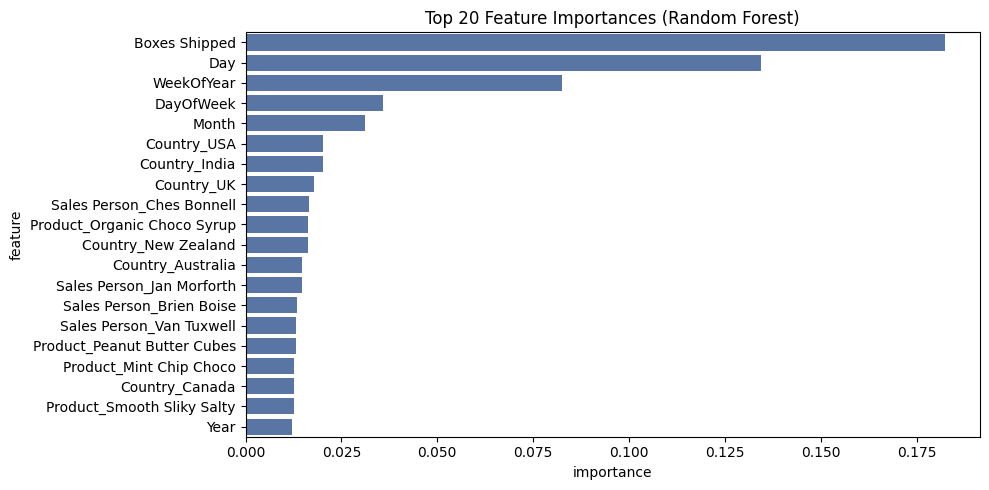

In [30]:
# Feature importance (RF) - portfolio highlight

ohe = rf_pipe.named_steps["preprocess"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(cat_cols)
all_feature_names = np.concatenate([cat_feature_names, np.array(num_cols)])

importances = rf_pipe.named_steps["model"].feature_importances_
imp_df = pd.DataFrame({"feature": all_feature_names, "importance": importances})
imp_df = imp_df.sort_values("importance", ascending=False)

display(imp_df.head(20))

plt.figure(figsize=(10,5))
sns.barplot(data=imp_df.head(20), x="importance", y="feature", color="#4C72B0")
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()
